### 🌸 Iris Classification Model

This notebook focuses on constructing a classification model using the Iris dataset, a well-known multiclass classification problem in the machine learning community. The goal is to accurately predict the species of Iris flowers based on four key morphological features:
- 🌿 Sepal length
- 🌿 Sepal width
- 🌸 Petal length
- 🌸 Petal width

This involves selecting and training a suitable machine learning algorithm to learn from these features.

#### 🎯 Model Effectiveness

The effectiveness of the model will be dependent on its ability to generalize from the training data to unseen data, requiring careful consideration of:
- 🧠 Model selection
- 🏋️‍♂️ Training processes
- 📊 Evaluation of model performance

#### 🚀 Deployment

The trained model will then be integrated into a broader application infrastructure, serving predictions through an API developed with FastAPI, thus bridging the gap between data science and application deployment.

Let's start by exploring the data

In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

In [2]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target
data['species'] = data['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [3]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Shape and summary statistics
print(data.shape)
print(data.describe())


(150, 5)
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [5]:
# Check for missing values
print(data.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


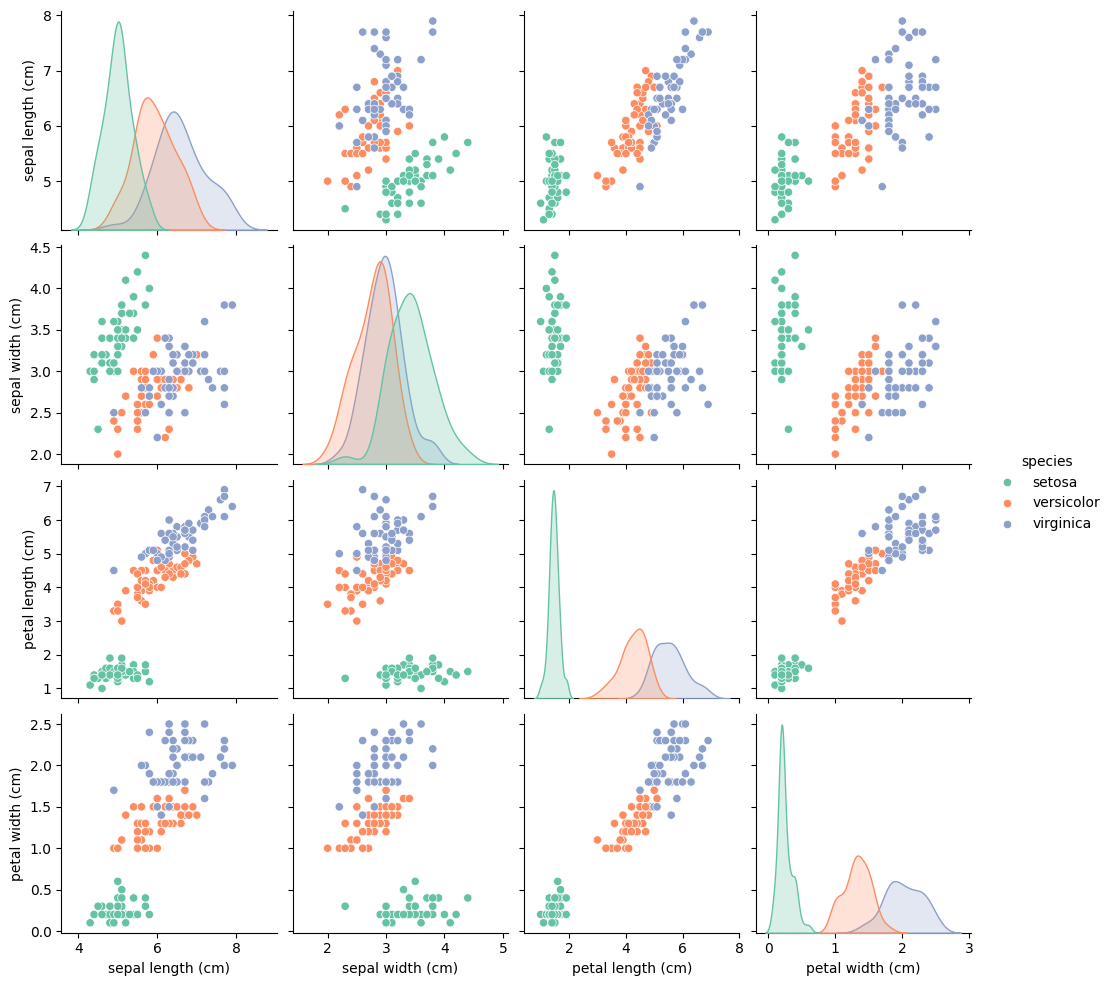

In [6]:
sns.pairplot(data, diag_kind='kde', hue='species', palette='Set2')
plt.show()

We observe distinct patterns across the three species (setosa, versicolor, and virginica):

- 🌸 **Petal Length (cm) and Petal Width (cm)**:
  - Exhibit clear separability between the species.
  - Setosa clusters distinctly apart from versicolor and virginica.
  - Versicolor and virginica show some overlap, indicating they are less easily distinguishable.

- 🌿 **Sepal Length (cm) and Sepal Width (cm)**:
  - Show more overlap across the species.
  - Suggest these features alone are less effective for classification.

- 📊 **Diagonal KDE Plots**:
  - Highlight the difference in feature distributions.
  - Setosa displays tighter distributions compared to the other species.

Overall, petal length and petal width appear to be the most discriminative features for species classification.

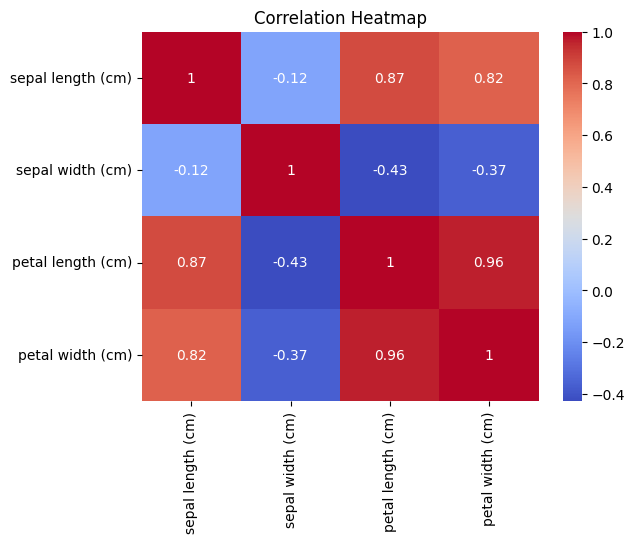

In [7]:
correlation_matrix = data.iloc[:, :-1].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

🔍 **Correlation Analysis**:

- **Strong Positive Correlations**:
  - 🌸 Petal length (cm) and petal width (cm): **0.96**
  - 🌿 Sepal length (cm) and petal length (cm): **0.87**
  - 🌿 Sepal length (cm) and petal width (cm): **0.82**

  These strong correlations suggest that petal dimensions are highly interdependent and likely offer the same information for distinguishing species.

- **Weak or Negative Correlations**:
  - 🌿 Sepal width (cm) shows weak or negative correlations with the other features.

  This indicates that sepal width may possibly have a limited role in species classification when compared to the other features.

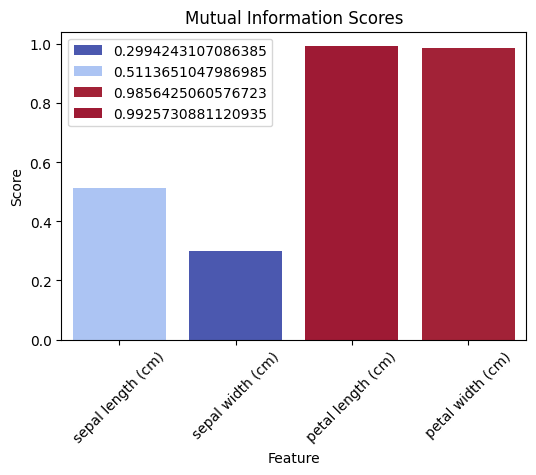

In [8]:
# Compute mutual information scores
X = data.iloc[:, :-1]  # Features
y = data['species']  # Target
mi_scores = mutual_info_classif(X, y, random_state=42)

# Create a heatmap-like visualization
plt.figure(figsize=(6, 4))
sns.barplot(x=X.columns, y=mi_scores, palette='coolwarm', hue=mi_scores)
plt.title("Mutual Information Scores")
plt.ylabel("Score")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.show()

📊 **Mutual Information Scores Analysis**:

- **High Importance Features**:
  - 🌸 Petal length (cm) and petal width (cm) have the highest mutual information scores, close to **1**.
  - These scores suggest they are the most important features for distinguishing between species.

- **Low Importance Features**:
  - 🌿 Sepal length (cm) and sepal width (cm) have significantly lower scores.
  - Specifically, sepal width (cm) has the lowest score, indicating it contributes the least information for classification.

This analysis confirms that petal dimensions are the key drivers for species prediction in this dataset.

## 🧠 Modeling

So far, we can conclude that:
#### 🌟 Feature Importance:

- **Petal length** and **petal width** are the most significant features for predicting species in the Iris dataset.
  - They exhibit the strongest relationships with the target variable.
  - Highlighted by their high mutual information scores and clear separability in scatterplots.

#### 🌿 Weak Features:

- **Sepal length** and **sepal width** contribute less to the classification task.
  - These features display weaker correlations with the target variable.
  - Overlap across species in pairwise scatterplots, suggesting limited discriminatory power.

#### 📊 Dataset Insights:

- The Iris dataset has distinct separations between **setosa** and the other species (as seen in visualizations).
- **Versicolor** and **virginica** show some overlap, particularly in less informative features like sepal dimensions.

#### 🚀 Modeling Implications:

- Features such as **petal length** and **petal width** should be prioritized for training models as they carry most of the predictive information.
- Reducing feature space by excluding weaker features like **sepal width** may simplify the model without significantly impacting performance.

In [9]:
# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
with open('../models/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

## 🔍 Model Exploration

🛠️ We'll explore three different classification models and pick 🎯 the one with the best accuracy performance. Then use it to deploy the application.

**Logistic Regression**

In [12]:
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

In [13]:
grid_lr = GridSearchCV(LogisticRegression(max_iter=200), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train_scaled, y_train)

print("Best Parameters (Logistic Regression):", grid_lr.best_params_)
print("Best Score (Logistic Regression):", grid_lr.best_score_)

Best Parameters (Logistic Regression): {'C': 10, 'solver': 'lbfgs'}
Best Score (Logistic Regression): 0.9666666666666668


In [14]:
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test_scaled)

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**K-Nearest Neighboors (KNN)**

In [15]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [16]:
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train_scaled, y_train)

print("Best Parameters (KNN):", grid_knn.best_params_)
print("Best Score (KNN):", grid_knn.best_score_)

Best Parameters (KNN): {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Best Score (KNN): 0.9666666666666668


In [17]:
best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

print("KNN Report:")
print(classification_report(y_test, y_pred_knn))

KNN Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



**Random Forest Classifier**

In [18]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [19]:
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Best Parameters (Random Forest):", grid_rf.best_params_)
print("Best Score (Random Forest):", grid_rf.best_score_)

Best Parameters (Random Forest): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score (Random Forest): 0.95


In [20]:
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



### Model selection 🎯

In [21]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Logistic Regression Accuracy: 1.0
KNN Accuracy: 0.9333333333333333
Random Forest Accuracy: 0.9


In [22]:
with open('../models/best_lr.pkl', 'wb') as file:
    pickle.dump(best_lr, file)
